# Visualizing categorical data

**全文摘要**

本文介绍了使用seaborn库进行分类数据可视化的方法，包括散点图、分布图和中心趋势估计图。通过catplot()函数，可以方便地切换不同的可视化类型，如stripplot()、swarmplot()、boxplot()、violinplot()、barplot()、countplot()和pointplot()，以回答不同的数据问题。文章还讨论了如何通过hue语义添加额外维度，以及如何控制分类变量的排序和轴向。

**关键段落**

- **分类散点图**: 使用stripplot()和swarmplot()，通过jitter或算法防止重叠来表示分类变量和数值变量之间的关系。
- **分布比较**: 当数据集较大时，使用boxplot()和violinplot()来总结和比较每个分类中的值分布。
- **中心趋势估计**: 使用barplot()和pointplot()来展示每个分类中值的中心趋势估计，如平均值或计数。
- **显示额外维度**: 通过hue语义添加额外维度，例如在散点图中改变点的颜色，或在箱线图中调整箱的宽度和位置。
- **分类变量排序和轴向**: seaborn尝试从数据中推断分类变量的顺序，也可以通过order参数或native_scale参数进行控制。
- **高级可视化选项**: 使用catplot()的facetting变量来可视化更高维度的关系，并使用FacetGrid对象的方法进行进一步的自定义。

在处理涉及分类数据（categorical data）的可视化时，将不同类型的分类图表视为属于三个不同的家族（families）是有帮助的。这三个家族将在后面的部分详细讨论。具体来说，这些家族包括：

1. **分类散点图（Categorical scatterplots）**：
   - `stripplot()`：使用默认的`kind="strip"`，显示数据点，每个分类的点会有轻微的随机抖动（jitter）以避免重叠。
   - `swarmplot()`：使用`kind="swarm"`，通过一种算法调整点的位置，以避免重叠，适用于相对较小的数据集。
2. **分类分布图（Categorical distribution plots）**：
   - `boxplot()`：使用`kind="box"`，展示数据的四分位数和异常值，通过箱形图来表示。
   - `violinplot()`：使用`kind="violin"`，结合了箱形图和核密度估计，提供更丰富的数据分布描述。
   - `boxenplot()`：使用`kind="boxen"`，类似于箱形图，但优化了对数据分布形状的展示。
3. **分类估计图（Categorical estimate plots）**：
   - `pointplot()`：使用`kind="point"`，显示每个分类的中心趋势估计值和置信区间。
   - `barplot()`：使用`kind="bar"`，条形图显示每个分类的统计量（默认为均值）。
   - `countplot()`：使用`kind="count"`，显示每个分类的观测数量。

这些不同的图表类型代表了数据的不同粒度级别。在选择使用哪种图表时，需要考虑你想要回答的问题。统一的API（应用程序编程接口）使得在不同类型之间切换变得容易，从而可以从多个角度观察数据。

## Categorical scatter plots

首先指出`catplot()`函数的默认数据表示形式是使用散点图。但是，Seaborn 提供了两种不同的分类散点图表示方法，它们采用了不同的策略来解决使用散点图表示分类数据时的主要挑战。这个挑战是，如果按照传统的散点图表示方法，所有属于同一类别的点将会在对应分类变量的轴上占据相同的位置，这会导致数据点重叠，难以区分。

第一种方法是使用 `stripplot()`，这是 `catplot()` 函数中的默认“kind”类型。`stripplot()`通过在分类轴上对点的位置进行小量的随机“抖动”（jitter）来调整点的位置，从而避免点的重叠。这里的“jitter”参数可以控制抖动的大小，或者完全禁用抖动。

In [16]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

sns.set_theme()

In [17]:
tips = pd.read_csv("../../data/tips.csv")

Text(0.5, 1.0, 'Kind = swarm')

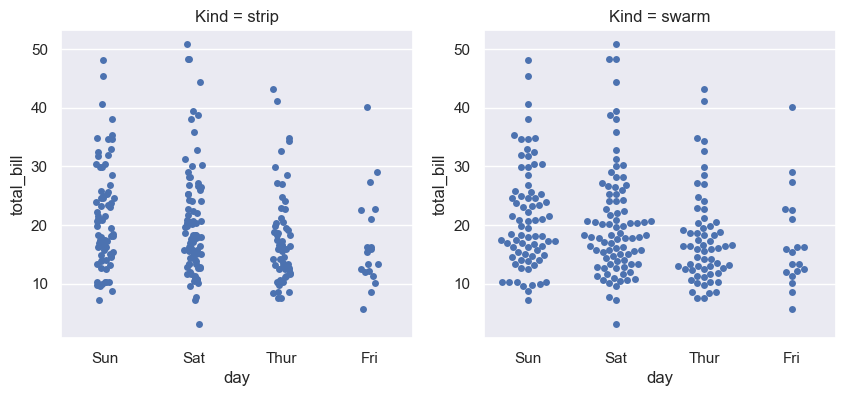

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.stripplot(tips, x="day", y="total_bill", ax=axes[0])
axes[0].set_title("Kind = strip")

sns.swarmplot(tips, x="day", y="total_bill", ax=axes[1])
axes[1].set_title("Kind = swarm")

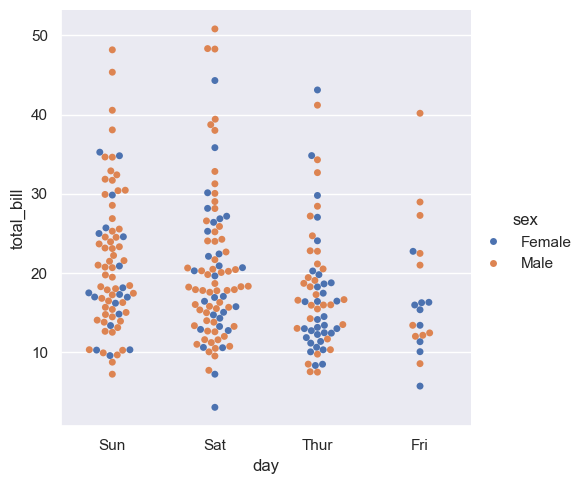

In [19]:
sns.catplot(tips, x="day", y="total_bill", kind="swarm", hue="sex")

与数值型数据不同，对于分类变量（categorical variable）的级别（levels）在坐标轴上的排序并不是总那么明显。数值型数据的排序通常很直观，因为数值有自然的大小顺序。然而，分类数据是由不同的类别组成的，这些类别可能没有固有的顺序或重要性，因此确定它们在图表上如何排列可能会更加复杂和主观。例如，颜色、品牌或国家的名称等分类变量，它们之间没有自然的大小或顺序关系。

在处理分类数据时，即使分类变量的标签是数字，它们默认情况下仍然被当作分类数据来处理，并在分类轴上按照顺序排列（即按照0, 1, 2, ...等顺序）。这与数值数据不同，数值数据通常会根据数值大小来排序。在这种情况下，即使分类变量的标签是数字，它们也会被按照它们在数据集中出现的顺序来排列，而不是按照数值大小来排序。这种处理方式有助于保持数据的分类特性，避免因数值大小而误导数据的可视化展示。

从Seaborn版本0.13.0开始，所有的分类绘图函数（如`catplot`）都增加了一个名为`native_scale`的参数。当你想要使用数值或日期时间数据来进行分类分组，但又不想改变数据的基本属性时，可以将这个参数设置为`True`。这意味着你可以利用数值或日期时间数据的自然顺序来进行分类，而不需要将这些数据转换为pandas的`Categorical`类型。

Text(0.5, 1.0, 'native_scale = True')

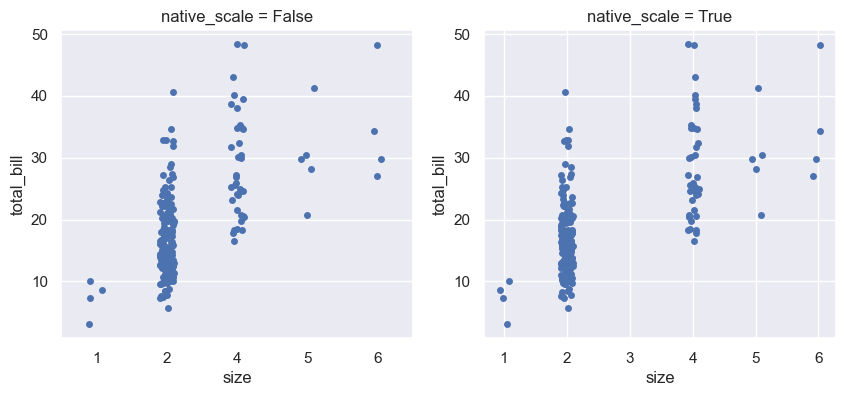

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.stripplot(
    data=tips.query("size != 3"),
    x="size",
    y="total_bill",
    ax=axes[0],
)
axes[0].set_title("native_scale = False")

sns.stripplot(
    data=tips.query("size != 3"),
    x="size",
    y="total_bill",
    native_scale=True,
    ax=axes[1],
)
axes[1].set_title("native_scale = True")

在创建包含分类变量的图表时，你可以选择使用数据集中分类变量的默认顺序。此外，你也可以通过使用`order`参数来在特定的图表中控制分类变量的顺序。这在绘制同一图形中的多个分类图表时特别重要，因为不同的图表可能需要不同的排序方式来更好地展示数据。

具体来说，如果你不指定`order`参数，图表将按照数据集中分类变量的顺序来展示。但是，如果你想要改变这种顺序，或者想要在多个图表中保持一致的分类顺序，你可以使用`order`参数来指定一个特定的顺序。例如，如果你有一个包含"No"和"Yes"两个类别的分类变量，并且你希望在所有图表中都按照"No"、"Yes"的顺序来展示，你可以在`catplot`函数中设置`order=["No", "Yes"]`。

这种方法可以帮助你更清晰地比较不同图表之间的数据，尤其是在进行多变量分析时。通过控制分类变量的顺序，你可以确保图表的一致性，并且使得结果更容易被读者理解。

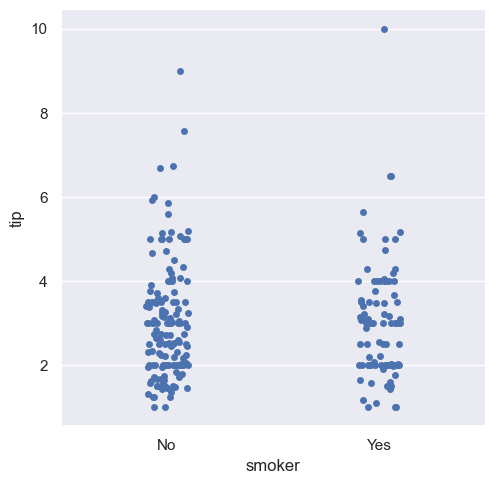

In [21]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

## Comparing distributions

随着数据集大小的增加，分类散点图在提供每个类别内值的分布信息方面变得有限。当这种情况发生时，有几种方法可以总结分布信息，以便更容易地在类别级别之间进行比较。

具体来说：

1. 数据集变大时，分类散点图在展示每个类别中值的分布情况时会受到限制。
2. 面对这种限制，存在多种方法可以对分布信息进行总结。
3. 这些方法的目的是使得跨类别级别的比较变得更加容易。

简而言之，在处理大数据集时，传统的散点图可能不足以展示所有需要的信息，因此需要采用其他方法来更好地理解和比较不同类别的数据分布。

### Box plots

箱线图（boxplot），这是一种统计图表，用来展示数据的分布情况。下面将逐一解释这段话中的关键点：

1. **"The first is the familiar boxplot()"**：这指的是箱线图，它是一种常见的数据可视化方法。
2. **"This kind of plot shows the three quartile values of the distribution"**：箱线图展示了数据分布的三个四分位数。四分位数是将数据分为四等分的数值，分别是第一四分位数（Q1），第二四分位数（Q2，也就是中位数），和第三四分位数（Q3）。
3. **"along with extreme values"**：箱线图还会展示极端值，即数据中远离大多数数据点的值。
4. **"The 'whiskers' extend to points that lie within 1.5 IQRs of the lower and upper quartile"**：这里的“触须”（whiskers）指的是箱线图的两端线，它们延伸到距离下四分位数和上四分位数1.5倍四分位距（IQR）的点。四分位距是第三四分位数和第一四分位数之间的差值，是衡量数据分布范围的一个指标。
5. **"and then observations that fall outside this range are displayed independently"**：这意味着，那些落在1.5倍四分位距范围之外的观测值会被单独显示，通常是以点的形式。
6. **"This means that each value in the boxplot corresponds to an actual observation in the data"**：这句话说明箱线图中的每个值都对应数据集中的一个实际观测值。

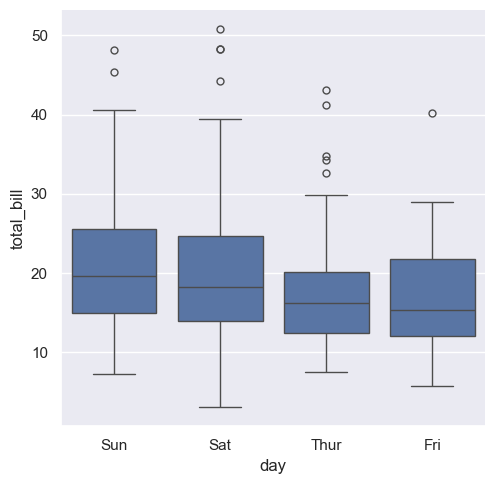

In [22]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

`boxenplot()` 函数，它是一个与箱线图（boxplot）相似的图表类型，但是它被优化用于展示数据分布的形状的更多信息。这种图表特别适合于较大的数据集。

具体来说，`boxenplot()` 与标准的箱线图在视觉呈现上有一些区别。箱线图通常显示数据的四分位数（包括中位数，即第二四分位数），并通过“触须”（whiskers）来表示数据的极端值，这些触须通常延伸到距离四分位数1.5倍四分位距（IQR）的位置。而 `boxenplot()` 则提供了一种不同的方法来展示数据的分布，它能够更细致地反映数据的密度和形状。

在 `boxenplot()` 中，数据的分布是通过一个点图（dot plot）来表示的，其中每个点代表数据集中的一个观测值。这种图表类型能够更好地展示数据的分布特征，比如偏斜、峰度等，尤其是在数据量较大时，它能够提供比传统箱线图更加丰富的信息。

例如，代码片段中的 `sns.catplot` 函数调用使用了 `kind="boxen"` 参数，这表明它将使用 `boxenplot()` 来创建图表，其中 `diamonds.sort_values("color")` 是数据集，`x="color"` 和 `y="price"` 分别指定了图表的 x 轴和 y 轴，用于展示不同颜色的钻石的价格分布情况。

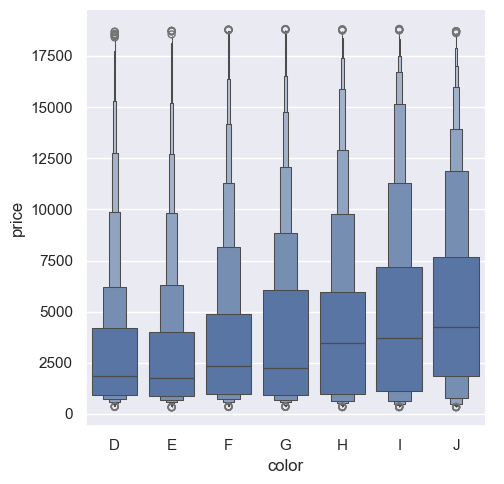

In [23]:
diamonds = pd.read_csv("../../data/diamonds.csv")
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color",
    y="price",
    kind="boxen",
)

**图表要素**：

1. **箱体和层级**：
   - 中间的箱体表示数据的四分位区间（25%到75%）。
   - 上下的层级代表数据分布的不同分位数，越靠近顶端和底端的层级，表示数据的越小或越大的百分比。
   - 每个层级的宽度表示该层级的分布宽度，宽度越大表示该部分的数据更加集中。
2. **中位数**：箱体中通常有一条线，表示数据的中位数。
3. **数据尾部**：上下延伸的层级代表了数据的尾部（即最高和最低的部分），它们能够展示数据的分布情况，尤其是离群值所在的区域。
4. **离群值**：虽然 `boxenplot` 不直接标出离群值（像 `boxplot` 那样用点表示），但通过层级的分布可以推断出数据的离群范围。

**解读方式**：

- **数据集中趋势**：可以通过观察箱体及其层级来判断数据的集中趋势。数据在某个层级集中说明该范围内的数据更多。
- **数据分布范围**：上下层级展示了数据的广泛分布范围，包括可能的极端值。与传统箱形图相比，`boxenplot` 可以更好地展示多层级的数据分布。
- **类别间的比较**：通过多个箱体及其层级的比较，你可以了解不同类别的数据分布差异。例如，某些类别的箱体可能明显比其他类别的要宽，这表明该类别的数据更加集中。

**适用场景**：

`boxenplot` 特别适合用于展示样本量较大时的数据分布情况，能够更细致地观察不同数据分位数的变化，从而帮助更深入地分析数据。

### Violin plots

一种不同的方法是小提琴图（violinplot），它结合了箱型图(boxplot)和在分布教程中描述的核密度估计(KDE)过程。

解释如下：

1. **A different approach**: 这里指的是一种不同于传统箱型图的可视化方法。
2. **violinplot()**: 这是一种数据可视化工具，用于展示数据的分布情况。它的名字来源于其形状类似于小提琴。
3. **combines a boxplot**: 它将箱型图的元素结合进来。箱型图是一种常用的统计图表，用于展示数据的中位数、四分位数和异常值。
4. **with the kernel density estimation procedure**: 这里指的是与核密度估计（KDE）过程的结合。核密度估计是一种用于估计概率密度函数的方法，它可以平滑地展示数据的分布情况。
5. **described in the distributions tutorial**: 这句话说明核密度估计的详细描述可以在某个分布教程中找到。

总的来说，这句话在介绍小提琴图作为一种结合了箱型图和核密度估计的数据可视化方法，它能够提供对数据分布的丰富描述。

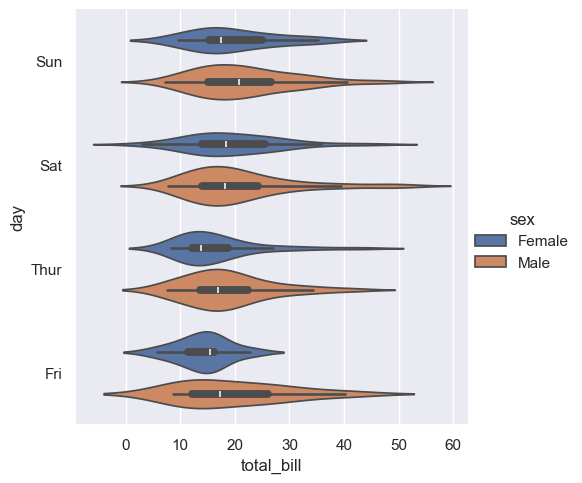

In [24]:
sns.catplot(
    data=tips,
    x="total_bill",
    y="day",
    hue="sex",
    kind="violin",
)

## Estimating central tendency

在某些情况下，可能不仅仅想展示每个类别内部的分布情况，而是想展示这些值的中心趋势的估计。中心趋势通常指的是数据集中的中心点，如平均值、中位数等。

Seaborn有两种主要的方式来展示中心趋势的估计：

1. **Bar plots（条形图）**: 使用`barplot()`函数，这个函数会对整个数据集应用一个函数来获取估计值（默认情况下是计算平均值）。如果有多个观测值在每个类别中，它还会使用bootstrapping（自助法）来计算估计值周围的置信区间，并通过误差条来绘制这个区间。
2. **Point plots（点图）**: 使用`pointplot()`函数，这个函数同样将估计值的高度编码在另一个轴上，但它不是展示一个完整的条形，而是绘制点估计和置信区间。此外，`pointplot()`还会将同一类别的点连接起来，这使得观察者可以很容易地看到主关系如何随着类别的变化而变化，因为人眼在识别斜率差异方面非常擅长。

### Bar plots

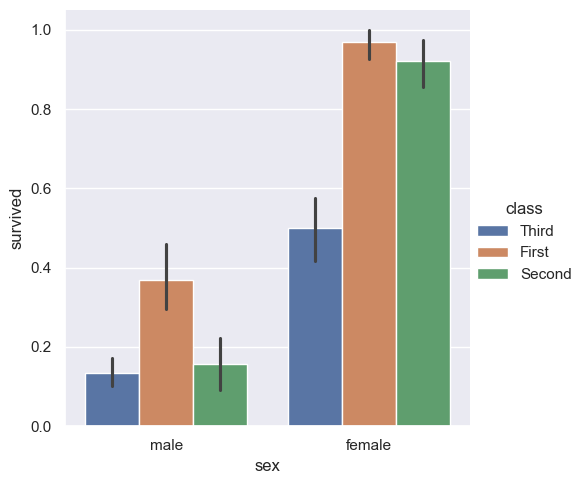

In [25]:
titanic = pd.read_csv("../../data/titanic.csv")
sns.catplot(
    data=titanic,
    x="sex",
    y="survived",
    hue="class",
    kind="bar",
)

1. **"The default error bars show 95% confidence intervals"**：这句话说明，默认情况下，Seaborn生成的条形图中的误差条表示的是95%置信区间。置信区间是一种统计学上的概念，用来表示估计值的不确定性。95%置信区间意味着，如果我们多次从同一总体中抽取样本并计算估计值，那么大约95%的估计值会落在这个区间内。
2. **"but (starting in v0.12), it is possible to select from a number of other representations"**：这句话指出，从Seaborn的0.12版本开始，用户可以选择其他类型的表示方法来展示误差条。这意味着除了95%置信区间之外，用户还可以选择其他统计方法来表示数据的不确定性，例如标准误差（standard error）、标准差（standard deviation）等。

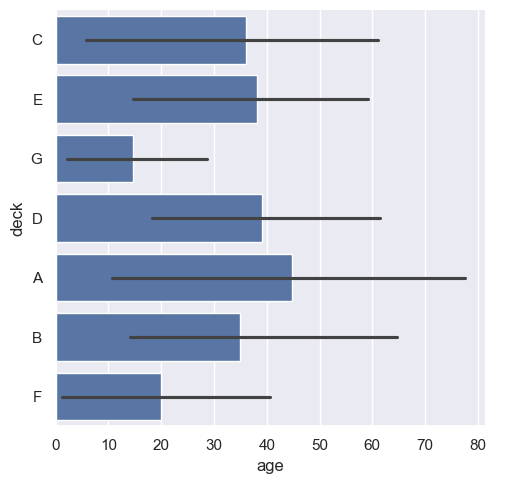

In [26]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

上面命令的 "pi" 指的是 **百分位数区间** (Percentile Interval), "95" 表示计算 95% 的百分位数区间. 这意味着误差线将表示数据中从 2.5% 到 97.5% 的分布范围, 这个区间覆盖了数据的 95% 部分.

**图表解读**

- **甲板 A**
  - 柱子长度: 大约 45 岁
  - 误差线范围: 从大于 10 岁到 80 岁
  - **解读**: 甲板 A 上的乘客平均年龄为 45 岁, 大部分乘客年龄分布在 10 岁到 80 岁之间, 显示出较大的年龄分布范围.

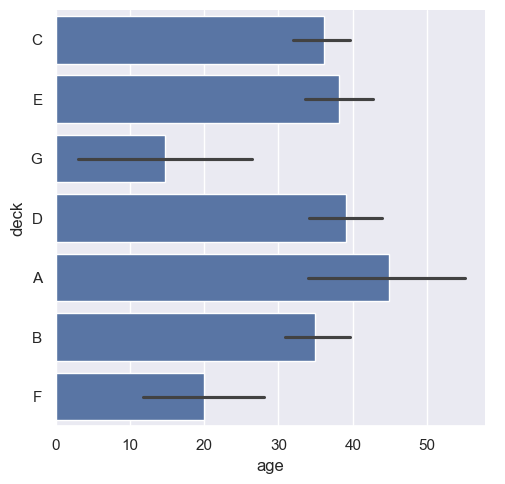

In [28]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("ci", 95), kind="bar")

上面命令的 "ci" 指的是 **置信区间** (Confidence Interval), "95" 表示计算 95% 的置信区间. 这意味着误差线将表示数据中我们有 95% 的信息说明平均值落在这个这个区间内.

**图表解读**

- **甲板 A**
  - 柱子长度: 大约 45 岁
  - 误差线范围: 从大于 33 岁到 58 岁
  - **解读**: 甲板 A 上的乘客平均年龄为 45 岁, 我们有 95% 的信心说平均年龄在 33 岁到 58 岁

### Point plots

`pointplot()`函数，它是一种用于可视化数据的替代方法。这个函数与之前提到的条形图（bar plot）类似，都是通过高度来表示估计值的大小，但是它不是展示一个完整的条形，而是绘制出点估计值和置信区间。此外，`pointplot()`还会将同一颜色类别的点连接起来。这样做的好处是，可以很容易地观察到主要关系如何随着颜色类别的变化而变化，因为我们的眼睛在识别斜率差异方面非常敏锐。

1. `pointplot()`函数提供了一种不同的数据可视化风格。
2. 它通过在y轴上的高度来表示估计值的大小。
3. 与条形图不同，`pointplot()`不展示完整的条形，而是展示点估计值和置信区间。
4. 它将同一颜色类别的点连接起来，这有助于观察不同类别之间的关系变化。
5. 由于我们的眼睛对斜率的识别能力很强，这种可视化方法可以更直观地展示数据的变化趋势。

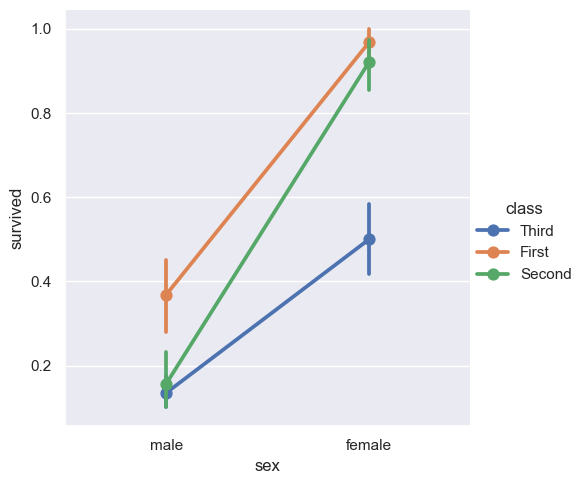

In [29]:
sns.catplot(
    data=titanic,
    x="sex",
    y="survived",
    hue="class",
    kind="point",
)

这个图表是使用 `sns.pointplot` 函数绘制的，显示了泰坦尼克号乘客的性别、所在舱位（First, Second, Third）与幸存率之间的关系。以下是从统计学角度对这个图表的分析：

1. **X轴：性别 (sex)**  

   X轴代表乘客的性别，分为 "male" 和 "female" 两个类别。

2. **Y轴：幸存率 (survived)**  

   Y轴表示的是幸存率。点的纵向位置表示在不同类别下的平均幸存率。

3. **颜色和线条：舱位 (class)**  

   颜色代表不同的舱位等级（First, Second, Third）。不同舱位的幸存率通过不同颜色的点和线表示。图中的线条连接了相同舱位在不同性别下的幸存率。

4. **误差棒 (Error Bars)**  

   每个点上的垂直误差棒表示幸存率的置信区间（通常是95%置信区间）。它反映了幸存率的估计值的精确度。误差棒越短，表示估计越精确。

5. **统计学意义**  

   - **性别影响**：无论舱位等级如何，女性乘客的幸存率普遍高于男性。这反映了在这次灾难中，女性更有可能获救。
   - **舱位影响**：在相同性别中，舱位越高（如First class），幸存率越高。这个现象可以归因于舱位较高的乘客在紧急情况下可能更容易接近救生设备或获得优先救助。
   - **交互效应**：图中的线条斜率不同，显示了性别和舱位的交互效应。例如，First class 男性和女性之间的幸存率差异更大，而 Third class 的男女差异则相对较小。

6. **结论**  

   这张图表展示了性别和舱位对乘客幸存率的显著影响。First class 女性的幸存率最高，Third class 男性的幸存率最低。这种幸存率的差异强调了性别和社会经济地位在生死攸关时的重要性。

如果需要更深入的统计分析（例如计算具体的置信区间或进行假设检验），可以进一步使用其他统计工具或方法来探讨这些数据。

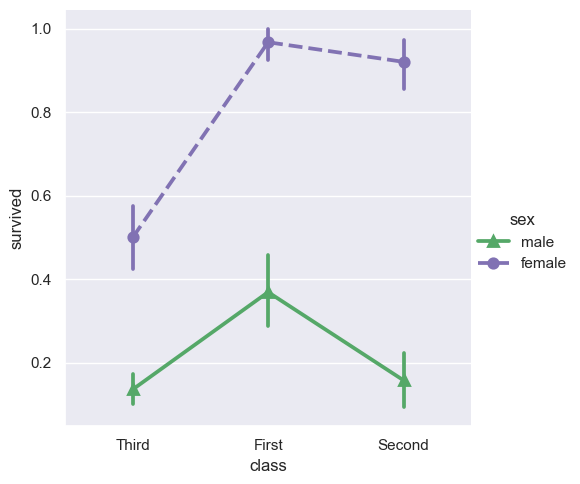

In [30]:
sns.catplot(
    data=titanic,
    x="class",
    y="survived",
    hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"],
    linestyles=["-", "--"],
    kind="point",
)

## Showing additional dimensions

就像`relplot()`函数一样，`catplot()`函数也是基于`FacetGrid`构建的，这意味着可以很容易地添加分面变量来可视化更高维度的关系。这里提到的`FacetGrid`是Seaborn库中的一个功能强大的工具，它允许用户在多个维度上创建图表，通过分面（faceting）的方式将数据分割成多个子图，每个子图代表数据的一个子集。

例如，可以按照不同的时间（`time`）、类别（`class`）或其他变量来分割数据，从而在多个子图中展示数据的不同方面。

具体来说，`catplot()`函数可以用来创建分类图（categorical plot），例如条形图、箱型图、点图等，而`FacetGrid`则提供了一种机制来根据一个或多个变量将这些分类图分割成多个面板，每个面板代表数据的一个特定子集。这样，用户就可以在不同的面板中观察到数据在不同条件下的表现，从而更深入地理解数据的多维特性。


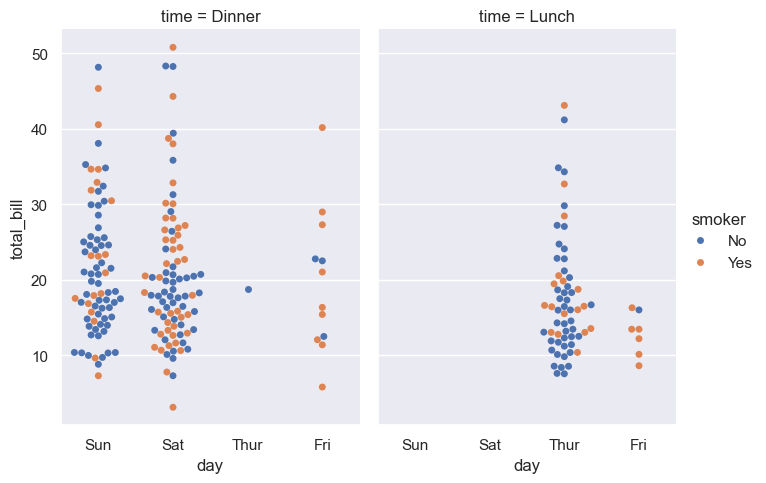

In [31]:
sns.catplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="smoker",
    kind="swarm",
    col="time",
    aspect=0.7,
)

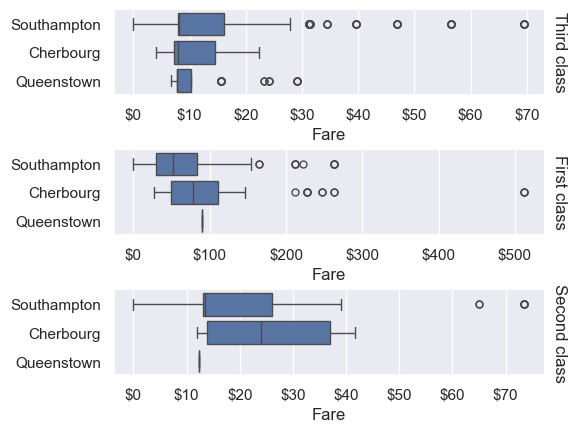

In [32]:
g = sns.catplot(
    data=titanic,
    x="fare",
    y="embark_town",
    row="class",
    kind="box",
    orient="h",
    sharex=False,
    margin_titles=True,
    height=1.5,
    aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter("${x:.0f}")